## Import Libraries

In [ ]:
!pip install transformers -q

     |████████████████████████████████| 3.8 MB 5.3 MB/s 
     |████████████████████████████████| 6.5 MB 33.5 MB/s 
     |████████████████████████████████| 77 kB 5.8 MB/s 
     |████████████████████████████████| 895 kB 44.6 MB/s 
     |████████████████████████████████| 596 kB 44.0 MB/s 


In [ ]:
!pip install nrclex

     |████████████████████████████████| 396 kB 5.2 MB/s 
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43329 sha256=1d6b8b66fa95060be994d5eed0bad7a43a451432880c0cf3a6878d7b52425e72
  Stored in directory: /root/.cache/pip/wheels/af/2c/9c/dfa19d1b65326c520b32850a9311f6d4eda679ac04dba26081
Successfully built nrclex


In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
import seaborn as sns
from wordcloud import wordcloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from transformers import pipeline
from nrclex import NRCLex

## Import Data

In [ ]:
## Mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the data i to a pandas dataframe
twitter_data = pd.read_csv('/content/drive/MyDrive/Location Trend Tweets 2022-04-01.csv')
twitter_data

,screen_name,hashtag,tweet,time_stamp
0,Rafael8Raphael,#BBIFinalVerdict,RT @Turk_Voices: I know challenge my fellow Ke...,2022-04-01 07:58:45+00:00
1,TNgichabe,#BBIFinalVerdict,RT @PeterRatemo4: If you will vote for William...,2022-04-01 07:58:43+00:00
2,NyongesaSande,#BBIFinalVerdict,Stellato the Mall This building is convenient...,2022-04-01 07:58:39+00:00
3,kingau,#BBIFinalVerdict,RT @SirJimKitch: They heckled him.\n\nJeered h...,2022-04-01 07:58:37+00:00
4,MuvitiSamuel,#BBIFinalVerdict,RT @NaomiNgatia: BBI is dead and buried✅\nAzim...,2022-04-01 07:58:25+00:00
...,...,...,...,...
2460,Oduor254k,RIP BBI,RT @DoryneEdwards: #bbifinalverdict \nRIP BBI....,2022-04-01 04:51:36+00:00
2461,ki96269449,RIP BBI,RT @cosmochoy: I have never been this happy.\n...,2022-04-01 04:44:36+00:00
2462,abedii_keter,RIP BBI,RT @cosmochoy: I have never been this happy.\n...,2022-04-01 04:41:06+00:00
2463,kipngeno_arnold,RIP BBI,RT @cosmochoy: I have never been this happy.\n...,2022-04-01 04:40:53+00:00


## Clean Data

From the desplayed dataframe of the tweeter data, a number of tweets seen to be repeated potentially from retweets. However, we will include them in our predictions since they have been sent by different people hence considered as different opinions.  We will first state our cleaning by removing @mentions, hyperlinks, new lines and everthing except letters and numbers. Later, we will play around with diffent cleaning procedures like retaining punctuation marks and/or hashtags to see if those have any effect in our analysis.

In [ ]:
## clean text

def text_cleaner (text):
  """
    A function to clean the tweet text
    """
  text = re.sub(r'@[A-Za-z0-9]+','',text) ## remove @ mentions
  #text = re.sub(r'#','',text) ## remove # symbol
  text = re.sub(r'^RT+','',text) ## remove RT
  text = re.sub(r'https?:\/\/\S+','',text) ## remove hyperlink
  #text = re.sub(r'[^\w\s]','',text) ## remove everything apart from words and space
  #text = re.sub(r'_',' ',text) ## remove underscore
  text = re.sub(r'\n',' ',text) ## remove \n
  text = re.sub(r"[^A-Za-z0-9#'?!,.]+", ' ', text) ##Remove anything not letter, number, or listed punctuation 

  """
  Retain # because of its meaning in tweets
  """

  return text


In [ ]:
## Create clean text column

twitter_data['cleaned_tweet'] = twitter_data['tweet'].apply(text_cleaner)
twitter_data = twitter_data[['screen_name','hashtag','tweet','cleaned_tweet','time_stamp']]

#Desplaying a few text for visual inspection
for i,tweet in enumerate(twitter_data['cleaned_tweet'].head(10)):
    print(i+1, tweet, '\n')

1  Voices I know challenge my fellow Kenyans to join hands ,we sue the president for using our resources Illegally to drive an unc  

2  If you will vote for William Samoei Ruto as the 5th President, Like and Retweet Widely. #BBIFinalVerdict  

3 Stellato the Mall This building is conveniently positioned in the Westlands neighbourhood, an affluent modern area  

4  They heckled him. Jeered him. Shout him down. Called him names. He stood firm, strong and determined. He presented hi  

5  BBI is dead and buried Azimio is dead and buried Now we wait for the swearing in of our 5th president ...  

6  Former Iron lady Karua secretly withdrew her submissions at the supreme goat immediately after joining kuzimia hoping t  

7  Njoki Ndungu., told us with a straight face that Uhuru can initiate BBI by popular initiative because he's Wanjiku but h  

8  Here is another Albert Ouma #BBIFinalVerdict  

9 Featuring a restaurant, a fitness centre, a bar and a shared lounge, Skynest Apartments Westl

## Sentiment Analysis With TextBlob

### Get Text Subjectivity

Subjectivity quantifies the amount of personal opinion and factual information contained in the text. Higher subjectivity means that the text contains personal opinion rather than factual information

In [ ]:
## subjectivity fxn

def get_subjectivity (text):

  return TextBlob(text).sentiment.subjectivity

### Get Text Polarity

Determining whether a word, phrase, or document is positive, negative, or neutral, ranging from -1 score as very negative to +1 as very posivite with 0 being neutral. The subjectivity varies from 0 as objective texts to 1 being more subjected texts.

In [ ]:
## Polarity fxn

def get_polarity (text):

  return TextBlob(text).sentiment.polarity

In [ ]:
text1 = 'amazing'
text2 = 'AMAZING'
text3 = 'AMAZING!'
text4 = 'not bad'
text5 = 'not that bad'
text6 = 'not very bad'

print(TextBlob(text1).sentiment.polarity)
print(TextBlob(text2).sentiment.polarity)
print(TextBlob(text3).sentiment.polarity)
print(TextBlob(text4).sentiment.polarity)
print(TextBlob(text5).sentiment.polarity)
print(TextBlob(text6).sentiment.polarity)


0.6000000000000001
0.6000000000000001
0.7500000000000001
0.3499999999999999
-0.6999999999999998
0.26923076923076916


In [ ]:
## Create subjectivity and polarity columns

twitter_data['subjectivity'] = twitter_data['cleaned_tweet'].apply(get_subjectivity)

twitter_data['polarity'] = twitter_data['cleaned_tweet'].apply(get_polarity)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2465 entries, 0 to 2464
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   screen_name    2465 non-null   object 
 1   hashtag        2465 non-null   object 
 2   tweet          2465 non-null   object 
 3   cleaned_tweet  2465 non-null   object 
 4   time_stamp     2465 non-null   object 
 5   subjectivity   2465 non-null   float64
 6   polarity       2465 non-null   float64
dtypes: float64(2), object(5)
memory usage: 134.9+ KB


## EDA

In the first cleaning process where we cleaned including the punctuation marks, the polarity score had a mean of 0.117077, with the median at 0. When the punctuation are left during cleaning, the mean value slightly but significantly improved to 0.119871. The change in classification is seem with an increase in the positive class from 1027 to 1049 and a decrease in the neutral class from 1115 to 1093. This sugests that the puctuations are singificant in detecting emotions. When the hastag is left or removed, the effect is negligible.

In [ ]:
## Filter for necessary columns
clean_data = twitter_data[['cleaned_tweet','subjectivity','polarity']]
clean_data['sentiment_class'] = np.where(clean_data['polarity'] > 0, 'positive', 
         (np.where(clean_data['polarity'] < 0, 'negative', 'neutral')))
                                        
clean_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,cleaned_tweet,subjectivity,polarity,sentiment_class
0,Voices I know challenge my fellow Kenyans to ...,0.500000,-0.500000,negative
1,If you will vote for William Samoei Ruto as t...,0.400000,-0.100000,negative
2,Stellato the Mall This building is convenientl...,0.625000,0.425000,positive
3,They heckled him. Jeered him. Shout him down....,0.474074,0.025926,positive
4,BBI is dead and buried Azimio is dead and bur...,0.400000,-0.200000,negative


In [ ]:
## Distribution of polarity and subjectivity

clean_data[['subjectivity','polarity']].describe()

#2465.000000 	2465.000000
#mean 	0.310530 	0.117077
#std 	0.307124 	0.266387
#min 	0.000000 	-1.000000
#25% 	0.000000 	0.000000
#50% 	0.254167 	0.000000
#75% 	0.540000 	0.229167
#max 	1.000000 	1.000000

#2465.000000 	2465.000000 
#mean 	0.315191 	0.119871
#std 	0.306359 	0.269589
#min 	0.000000 	-1.000000
#25% 	0.000000 	0.000000
#50% 	0.288889 	0.000000
#75% 	0.540000 	0.245455
#max 	1.000000 	1.000000


,subjectivity,polarity
count,2465.000000,2465.000000
mean,0.315191,0.119871
std,0.306359,0.269589
min,0.000000,-1.000000
25%,0.000000,0.000000
50%,0.288889,0.000000
75%,0.540000,0.245455
max,1.000000,1.000000


In [ ]:
clean_data['sentiment_class'].value_counts()
# neutral 1115
# positive 1027
# negative 323

#neutral     1093
#positive    1049
#negative     323

# retaining the puncuation marks during data cleaning slightly inproves the classifications 
#by redusing the neutral classified sample

neutral     1093
positive    1049
negative     323
Name: sentiment_class, dtype: int64

In [ ]:
clean_data['sentiment_class'].value_counts(normalize=True)
#neutral     0.452333
#positive    0.416633
#negative    0.131034

#neutral     0.443408
#positive    0.425558
#negative    0.131034


neutral     0.443408
positive    0.425558
negative    0.131034
Name: sentiment_class, dtype: float64

When Exploring the text to see if the negative sentiments were correctly classifed, suprisingly, some positive texts like the 1 and neural texts like 3 are classifed as negative. Text like the 20 is very dificult to really classify it correctly since it contains both positive and negative parts. For the positively classified sentiments, a great number of the texts seem to be correctly classifed. Some text seem to be incorrectly classified as neural.18 looks more like a negative sentiment.

We explored the stated misclassified with vader. Vader seem to correctly classify a misclassied texts respectively.

In [ ]:
# separating a set of the negative texts and displaying the text for visual inspection
df_negative = clean_data[clean_data['sentiment_class'] == 'negative'].sample(n=20, random_state = 42)

#desplaying
for i,tweet in enumerate(df_negative['cleaned_tweet']):
    print(i+1, tweet, '\n')


1  Being a firm believer in the rule of law and independence of our judiciary I commend the courts for their sober reasoned j  

2  The High Court ruling did not make constitution impossible to amend, it sought to operationalise the basic structure that SC  

3  Gladys Wanga Handed ODM Ticket In Homa Bay Governor Race After 7 Aspirants Step Down  

4  Today is Government don t care it got harder to pay your bills amp heat your home Day They think we are all Fools #AprilFoo  

5 Reggae is dead Hallelujah  

6  BBI reggae is dead! But #postmedicalinterns reggae is STILL ON! mochache cs  

7  Totally false charge by a court low on jurisprudential self esteem and endlessing wanting lawyers amp litig  

8  In political families just like conventional families, there are radical decisions that have to be taken. di  

9  Death is death whether from an anopheles mosquito bite or a bazooka round. That is the fate of The BBI Bill. It is dead an  

10  how wild and corrupt is it that has sent a s

In [ ]:
# Exploring the posive statements

df_positive = clean_data[clean_data['sentiment_class'] == 'positive'].sample(n=20, random_state = 42)

for i,tweet in enumerate(df_positive['cleaned_tweet']):
    print(i+1, tweet, '\n')


1  We know that reggae will resume once we elect Baba as President. It will follow the right process. It is a win f  

2  bot I don't care what they say about them Super Junior . I only know what I see, SJ is special. 

3  I find it difficult to distance the President from the involvement and initiation of the popular initiative, Justice Wanja  

4  #complete 6000 upjase respected cm plz complete junior aided vacancy ..exam is over still counselli  

5  jamesbrown I simply wish someone would prank the whole world, blow a universal trumpet, and make the entire world believe today is  

6  Magwanga , Orata , Ogwe , Awiti all support Wanga and a voter in Nairobi who voted Sonko over Kidero wants Kidero for Homaba  

7  Njoki Ndungu., told us with a straight face that Uhuru can initiate BBI by popular initiative because he's Wanjiku but h  

8 The #JumiaTechSale is still here! Click on link to enjoy these flash sales only on the  

9  Our Incoming Area MCA Kileleshwa is featured today on N

In [ ]:
# Exploring the posive statements

df_neutral = clean_data[clean_data['sentiment_class'] == 'neutral'].sample(n=20, random_state = 42)

for i,tweet in enumerate(df_neutral['cleaned_tweet']):
    print(i+1, tweet, '\n')


1  Kinuthia Ile maneno ya handshake ni utapeli' William Ruto says. Watch and subscr  

2  Habari ndio hio. Null and Void. Now those who misappropriated Public funds through this fraud must return. We are African  

3  With M Networks you can buy airtime using mpesa conveniently simply go to mpesa menu lipa na mpesa pay bill no  

4  Can somebody please please link ke up with the family of the NAFSA's girl please, I'm will to take over the case and appeal t  

5  Hp Elitebook touchscreen Intel Core i5 4GB RAM 500GB HDD With backlit keyboard 14inches WiFi enabled Webcam Enabled With wi  

6  Can somebody please please link ke up with the family of the NAFSA's girl please, I'm will to take over the case and appeal t  

7  munene Really?But after elections he could still be sued. Basic Structure was obvious,a constitution,any consti  

8  The Internal Security Organisation ISO has no business arresting suspects, President has said, clarifying  

9  RIP BBI,,,  

10  There was enough public

## Sentiment analysis with vader

When comparing the misclassied texts by textblob with vader and noting the improvement, we tried to explore the vedar sentiment analysis more. For the first cleaning with removed puctuations, the mean and median score were 0.225047 and 0.210400 respectively. with puncuations left, the scores improved to 0.233219 and 0.250000 respectively. The positive, neutral and negative scores changed from 1340, 761 and 364 to 1366, 746 and 353 respectively. This demonstrates the importance of puctuations for sentiment analysis with vaders too. 

When comparing the sentiment analysis by textblob and vender, we used the data where the puctuations were included in the tests. The number of sentiment classified as neutral highly reduced for our case. The fraction of classifications chaged from 0.443408 neutral, 0.425558 positive and 0.131034 negative, to 0.543611  positive, 0.308722 neutral and 0.147667 negative.

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.1 MB/s 


In [ ]:
#imorting the vader library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
text1 = 'amazing'
text2 = 'AMAZING'
text3 = 'AMAZING!'
text4 = 'not bad'
text5 = 'not that bad'
text6 = 'not very bad'

print(SentimentIntensityAnalyzer().polarity_scores(text1))
print(SentimentIntensityAnalyzer().polarity_scores(text2))
print(SentimentIntensityAnalyzer().polarity_scores(text3))
print(SentimentIntensityAnalyzer().polarity_scores(text4))
print(SentimentIntensityAnalyzer().polarity_scores(text5))
print(SentimentIntensityAnalyzer().polarity_scores(text6))

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5859}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5859}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6239}
{'neg': 0.0, 'neu': 0.26, 'pos': 0.74, 'compound': 0.431}
{'neg': 0.0, 'neu': 0.412, 'pos': 0.588, 'compound': 0.431}
{'neg': 0.0, 'neu': 0.395, 'pos': 0.605, 'compound': 0.4708}


In [ ]:
#definining a function for polarity classification with vader
def get_vpolarity (text):

  return SentimentIntensityAnalyzer().polarity_scores(text)


In [ ]:
#printing a few exaple to compare the wrongly classifed examples in the negative classified category with TextBlob
text1 = 'Being a firm believer in the rule of law and independence of our judiciary I commend the courts for their sober reasoned j'
text2 = 'Gladys Wanga Handed ODM Ticket In Homa Bay Governor Race After 7 Aspirants Step Down'
print(get_vpolarity(text1))
print(get_vpolarity(text2))


{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'compound': 0.4404}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [ ]:
#printing a few exaple to compare the wrongly classifed examples in the neutral classified category with TextBlob
text4 = 'fels1 You have irreparably provoked voters in Homa Bay. You will never be President. Nkt!'

print(get_vpolarity(text4))

{'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'compound': -0.3382}


In [ ]:
clean_data['score'] = clean_data['cleaned_tweet'].apply(get_vpolarity)
clean_data['compound'] = clean_data['score'].apply(lambda score_dict: score_dict['compound'])
clean_data.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,cleaned_tweet,subjectivity,polarity,sentiment_class,score,compound
0,Voices I know challenge my fellow Kenyans to ...,0.500000,-0.500000,negative,"{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...",0.3612
1,If you will vote for William Samoei Ruto as t...,0.400000,-0.100000,negative,"{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'comp...",0.3612
2,Stellato the Mall This building is convenientl...,0.625000,0.425000,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,They heckled him. Jeered him. Shout him down....,0.474074,0.025926,positive,"{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'comp...",0.6908
4,BBI is dead and buried Azimio is dead and bur...,0.400000,-0.200000,negative,"{'neg': 0.358, 'neu': 0.642, 'pos': 0.0, 'comp...",-0.8910


In [ ]:
## Filter for necessary columns
clean_data['vclass'] = np.where(clean_data['compound'] > 0.05, 'positive', 
         (np.where(clean_data['compound'] < -0.05, 'negative', 'neutral')))

clean_data2 = clean_data[['cleaned_tweet','score','compound','vclass']]
                                        
clean_data2.head()

,cleaned_tweet,score,compound,vclass
0,Voices I know challenge my fellow Kenyans to ...,"{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...",0.3612,positive
1,If you will vote for William Samoei Ruto as t...,"{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'comp...",0.3612,positive
2,Stellato the Mall This building is convenientl...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
3,They heckled him. Jeered him. Shout him down....,"{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'comp...",0.6908,positive
4,BBI is dead and buried Azimio is dead and bur...,"{'neg': 0.358, 'neu': 0.642, 'pos': 0.0, 'comp...",-0.8910,negative


In [ ]:
clean_data2['compound'].describe()

#count    2465.000000
#mean        0.225047
#std         0.409326
#min        -0.938200
#25%         0.000000
#50%         0.210400
#75%         0.571900
#max         0.968600

#count    2465.000000
#mean        0.233219
#std         0.412221
#min        -0.938200
#25%         0.000000
#50%         0.250000
#75%         0.571900
#max         0.968600

count    2465.000000
mean        0.233219
std         0.412221
min        -0.938200
25%         0.000000
50%         0.250000
75%         0.571900
max         0.968600
Name: compound, dtype: float64

In [ ]:
clean_data2['vclass'].value_counts()
#positive    1340
#neutral      761
#negative     364

#neutral     1093 #textblob with exclametion marks retained
#positive    1049
#negative     323

#positive    1366
#neutral      746
#negative     353

positive    1340
neutral      761
negative     364
Name: vclass, dtype: int64

In [ ]:
clean_data2['vclass'].value_counts(normalize=True)

#positive    0.554158
#neutral     0.302637
#negative    0.143205

#positive    0.543611
#neutral     0.308722
#negative    0.147667


positive    0.543611
neutral     0.308722
negative    0.147667
Name: vclass, dtype: float64

### Visualization of the sentiment anlysis

#### subjectivity and polariyt plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


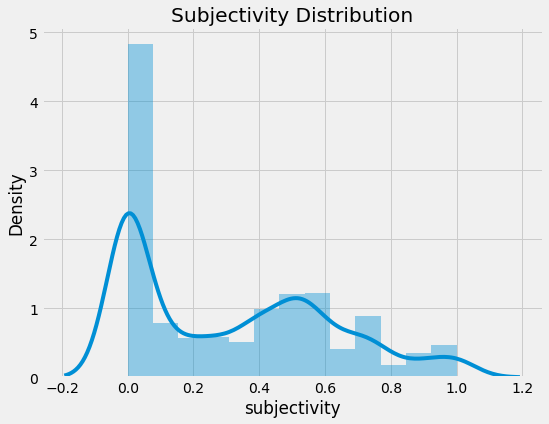

In [ ]:
#sns.scatterplot(data = clean_data, x = range(0,clean_data.shape[0]), y = "subjectivity")
plt.figure(figsize=(8,6))
plt.title('Subjectivity Distribution')
sns.distplot(clean_data['subjectivity'])
plt.show()


#### Polarity plots

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


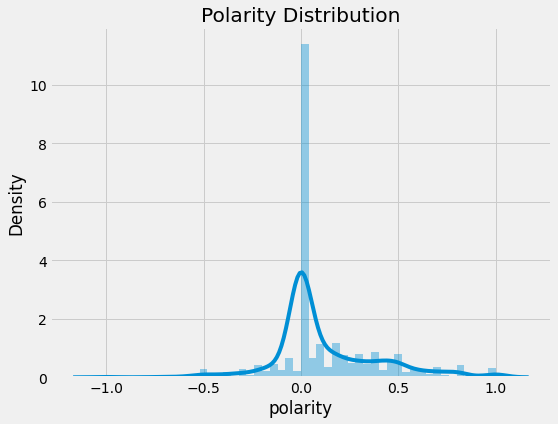

In [ ]:
#polarity with textblog
plt.figure(figsize=(8,6))
plt.title('Polarity Distribution')
sns.distplot(clean_data['polarity'])
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


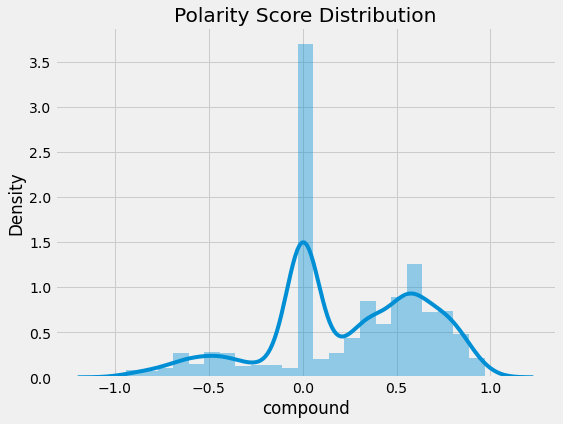

In [ ]:
#polarity with vander
plt.figure(figsize=(8,6))
plt.title('Polarity Score Distribution')
sns.distplot(clean_data2['compound'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


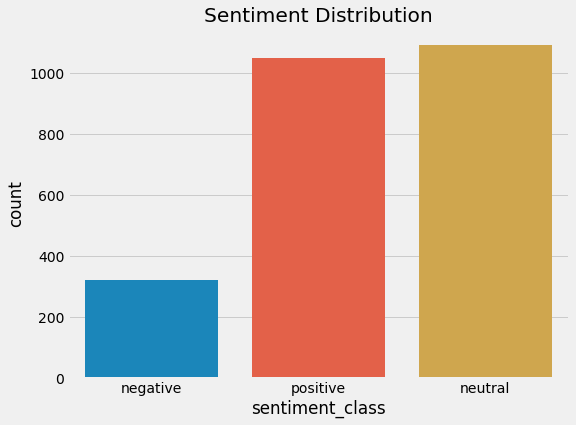

In [ ]:
#textblob
plt.figure(figsize=(8,6))
plt.title('Sentiment Distribution')
sns.countplot(clean_data['sentiment_class'])
#sns.countplot(clean_data2['vclass'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


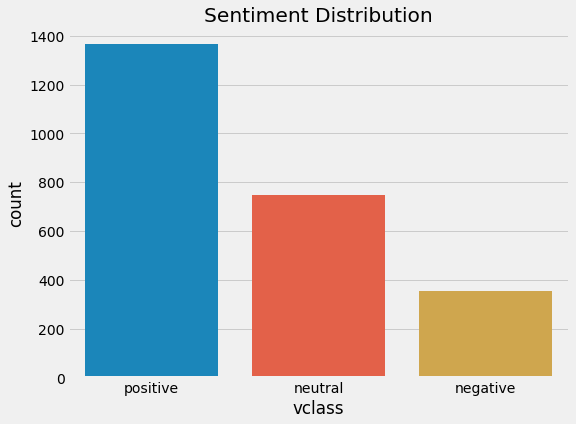

In [ ]:
#vander
plt.figure(figsize=(8,6))
plt.title('Sentiment Distribution')
#sns.countplot(clean_data['sentiment_class'])
sns.countplot(clean_data2['vclass'])
plt.show()

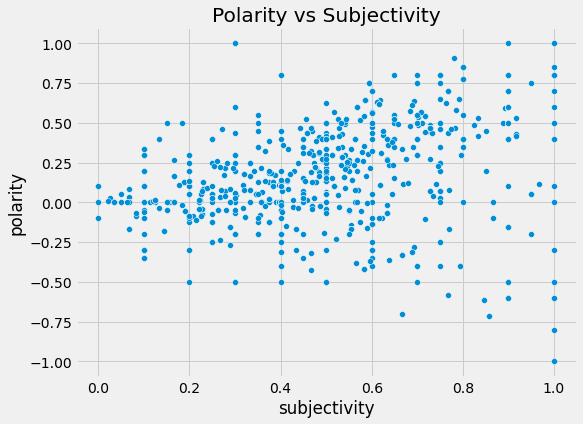

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Polarity vs Subjectivity')
sns.scatterplot(data= clean_data,x="subjectivity",y="polarity")
plt.show()

### Wordclouds

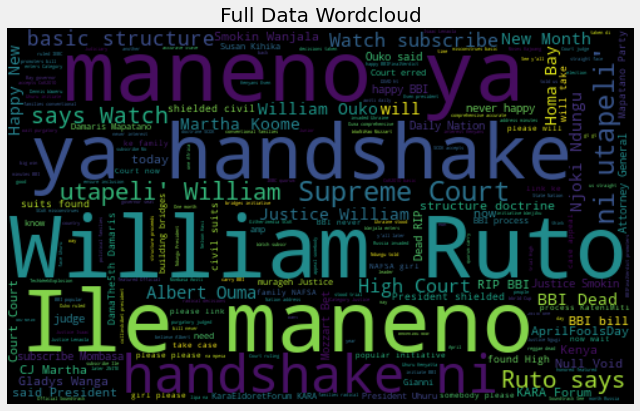

In [ ]:
## Whole Dataset
## Plot word cloud

all_words = ' '.join(twts for twts in clean_data['cleaned_tweet'])

text_cloud = wordcloud.WordCloud(height=300,width=500,random_state=10,max_font_size=110).generate(all_words) #background_color='white',

plt.figure(figsize=(10,8))
plt.title('Full Data Wordcloud')
plt.imshow(text_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()


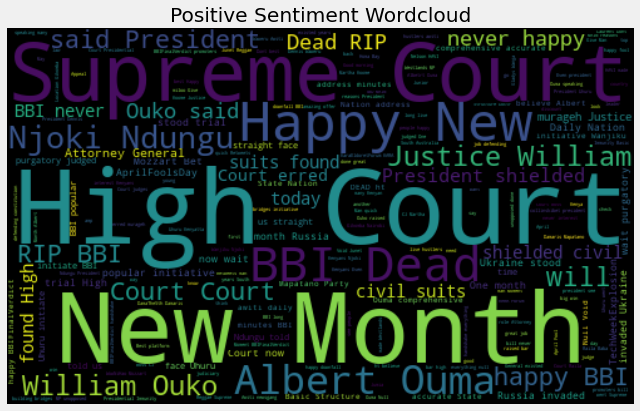

In [ ]:
## Positive polarity Textblob
positive_data = clean_data[clean_data['sentiment_class']=='positive']
all_words = ' '.join(twts for twts in positive_data['cleaned_tweet'])

text_cloud = wordcloud.WordCloud(height=300,width=500,random_state=10,max_font_size=110).generate(all_words)

plt.figure(figsize=(10,8))
plt.title('Positive Sentiment Wordcloud')
plt.imshow(text_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

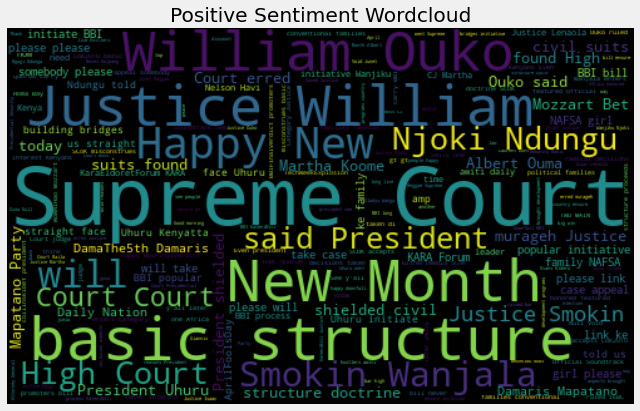

In [ ]:
#positive polarity score with vader
positive_data = clean_data2[clean_data2['vclass']=='positive']
all_words = ' '.join(twts for twts in positive_data['cleaned_tweet'])

text_cloud = wordcloud.WordCloud(height=300,width=500,random_state=10,max_font_size=110).generate(all_words)

plt.figure(figsize=(10,8))
plt.title('Positive Sentiment Wordcloud')
plt.imshow(text_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

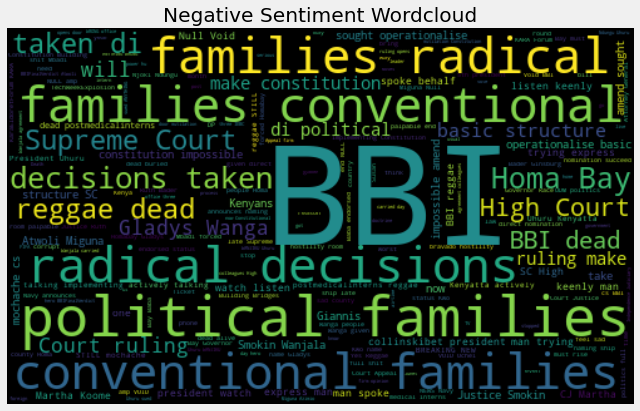

In [ ]:
## Negative polarity with textBlob
negative_data = clean_data[clean_data['sentiment_class']=='negative']
all_words = ' '.join(twts for twts in negative_data['cleaned_tweet'])

text_cloud = wordcloud.WordCloud(height=300,width=500,random_state=10,max_font_size=110).generate(all_words)

plt.figure(figsize=(10,8))
plt.title('Negative Sentiment Wordcloud')
plt.imshow(text_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

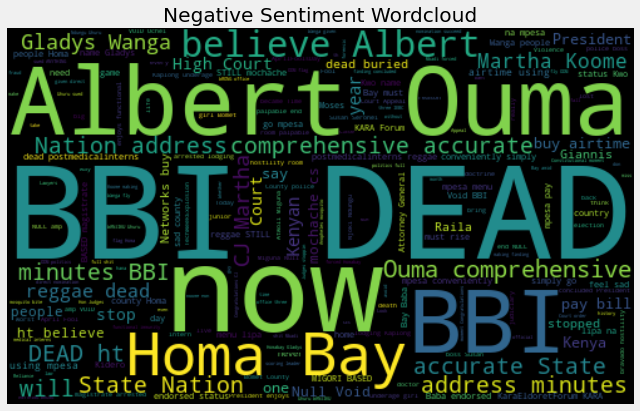

In [ ]:
## Negative polarity with vander
negative_data = clean_data2[clean_data2['vclass']=='negative']
all_words = ' '.join(twts for twts in negative_data['cleaned_tweet'])

text_cloud = wordcloud.WordCloud(height=300,width=500,random_state=10,max_font_size=110).generate(all_words)

plt.figure(figsize=(10,8))
plt.title('Negative Sentiment Wordcloud')
plt.imshow(text_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## Emotion Analysis

Text Emotion Detection using Hugging Face Model Hub's EmoRoberta. EmoRoberta leverages Roberta to perform Emotion classification into 28 categories of Emotion.

In [ ]:
## Define task and model

emotion = pipeline('sentiment-analysis',model='arpanghoshal/EmoRoBERTa')

Downloading:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
## Test emotion fxn
clean_data['cleaned_tweet'][:10].apply(emotion)

0    [{'label': 'neutral', 'score': 0.8259455561637...
1    [{'label': 'neutral', 'score': 0.9808431267738...
2    [{'label': 'approval', 'score': 0.944994211196...
3    [{'label': 'neutral', 'score': 0.9334883093833...
4    [{'label': 'sadness', 'score': 0.4858673810958...
5    [{'label': 'neutral', 'score': 0.7483462691307...
6    [{'label': 'neutral', 'score': 0.9952375888824...
7    [{'label': 'neutral', 'score': 0.9936057329177...
8    [{'label': 'neutral', 'score': 0.5492838621139...
9    [{'label': 'realization', 'score': 0.706656515...
Name: cleaned_tweet, dtype: object

In [ ]:
## Define Emotion fxn

def get_emotion_label (text):

  return (emotion(text)[0]['label'])

def get_emotion_score (text):

  return (emotion(text)[0]['score'])


In [ ]:
%%time
clean_data['emotion_label'] = clean_data['cleaned_tweet'].apply(get_emotion_label)
clean_data['emotion_score'] = clean_data['cleaned_tweet'].apply(get_emotion_score)
clean_data.head()

CPU times: user 44min 43s, sys: 9min 11s, total: 53min 55s
Wall time: 47min 35s


In [ ]:
clean_data.head()

,cleaned_tweet,subjectivity,polarity,sentiment_class,score,compound,vclass,emotion_label,emotion_score
0,Voices I know challenge my fellow Kenyans to ...,0.500000,-0.500000,negative,"{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...",0.3612,positive,neutral,0.825946
1,If you will vote for William Samoei Ruto as t...,0.400000,-0.100000,negative,"{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'comp...",0.3612,positive,neutral,0.980843
2,Stellato the Mall This building is convenientl...,0.625000,0.425000,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,approval,0.944994
3,They heckled him. Jeered him. Shout him down....,0.474074,0.025926,positive,"{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'comp...",0.6908,positive,neutral,0.933488
4,BBI is dead and buried Azimio is dead and bur...,0.400000,-0.200000,negative,"{'neg': 0.358, 'neu': 0.642, 'pos': 0.0, 'comp...",-0.8910,negative,sadness,0.485867


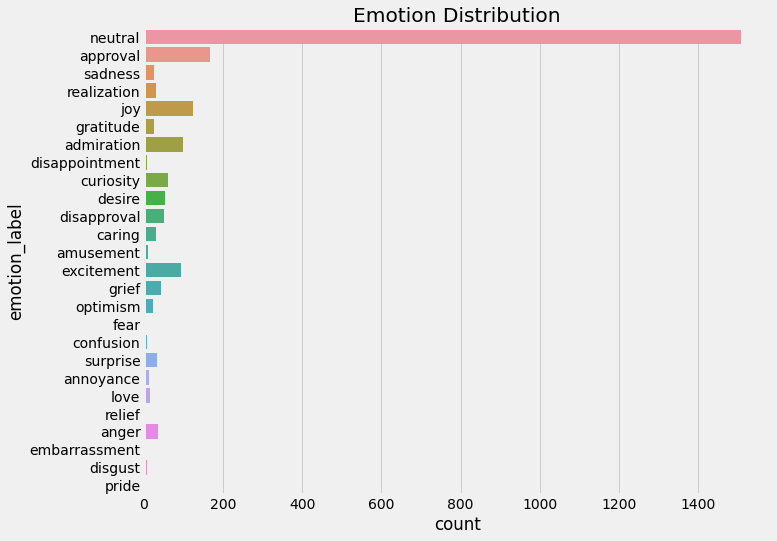

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Emotion Distribution')
sns.countplot(data=clean_data,y='emotion_label')
plt.show()

The original cleaning prosses had 1906 texts classified as neutral. with punctuation marks, the number of neutral sample reduced to 1507, giving us a chance to have more texts classied in other emotion categories.

In [ ]:
clean_data['emotion_label'].value_counts()

neutral           1507
approval           168
joy                124
admiration          99
excitement          94
curiosity           60
desire              53
disapproval         50
grief               43
anger               35
surprise            32
realization         30
caring              30
sadness             26
gratitude           25
optimism            22
love                14
annoyance           12
amusement           10
confusion            8
disappointment       8
disgust              8
fear                 4
relief               1
embarrassment        1
pride                1
Name: emotion_label, dtype: int64

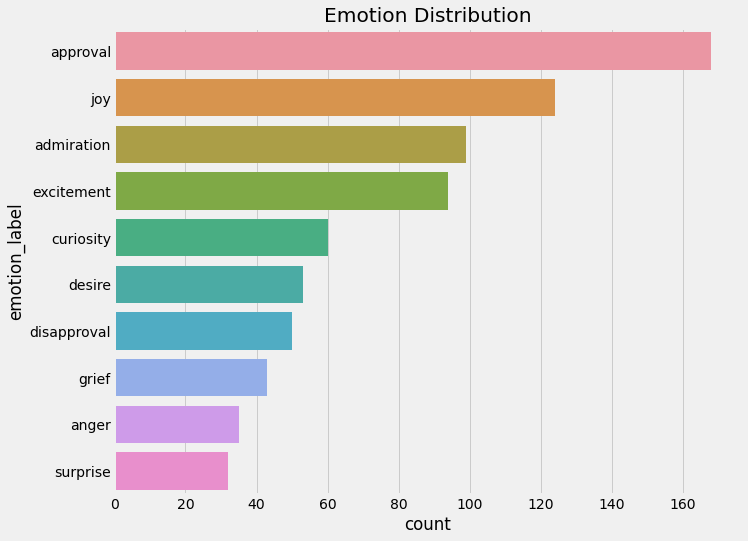

In [ ]:
## Take out dominating neutral
clean_data_neutraless = clean_data[~clean_data['emotion_label'].isin(['neutral'])]

descending_order = clean_data_neutraless['emotion_label'].value_counts().sort_values(ascending=False).index[:10]

plt.figure(figsize=(10,8))
plt.title('Emotion Distribution')
sns.countplot(data=clean_data_neutraless,y='emotion_label',order=descending_order)
plt.show()

### NRC Lexicon

In [1]:
clean_data['emotions'] = clean_data['cleaned_tweet'].apply(lambda x : NRCLex(x).affect_frequencies)
clean_data.head()

NameError: ignored

In [ ]:
emotions_data = pd.concat([clean_data.drop(['emotions'],axis=1),clean_data['emotions'].apply(pd.Series)],axis=1)
emotions_data.head()

In [ ]:
emotions_data.loc[:,'fear':].fillna(0).describe().transpose()